EXPLORATORY DATA ANALYSIS OF HOUSEHOLD ELECTRICITY USAGE:A CASE STUDY ON SOLAR ELECTRICITY GENERATION, WITH/WITHOUT SOLAR BATTERY COMBINATION AND ELECTRICITY FROM ELECTRICITY PROVIDERS.

# Background
Households have electricity usage needs. This electricity can be purchased from an electricity provider or generated using solar panels.

Naomi has installed solar panels on the roof of her house to generate electricity from the sun. Currently the electricity generated from the solar panels is used to meet any electricity usage in the house at the time it is generated. This saves Naomi money on her electricity costs because it reduces the amount of electricity she needs to buy from her electricity provider.

Naomi currently receives no benefit or income for the electricity generated by the solar panels that exceeds her electricity usage. She is, therefore, considering purchasing and installing a battery that would store any excess electricity generated from the solar panels. The battery would then discharge its energy to satisfy Naomi’s electricity usage at times when not enough solar power is being generated.

Electricity (including that generated by solar panels, stored in the battery and purchased from the electricity provider) is measured in kilowatt hours (kWh).

The battery that Naomi is considering costs $7,000 and would be installed on 1 January 2022, with an expected working lifetime of 20 years. The battery can store a maximum amount of
12.5 kWh of electricity at any one time (and is subject to a minimum of 0 kWh). Any electricity generated from the solar panels when the battery is full will not be able to be stored. Electricity usage would first be met from current solar electricity generation, then from any stored battery energy and finally by paying for electricity from the electricity provider.

From 1 January 2022, Naomi will pay $0.17 for each kWh of electricity purchased from her electricity provider. The electricity price increases with annual electricity price inflation on 1 January 2023, and each 1 January thereafter. A recent government report estimated electricity price inflation over the next 20 years to be 4% p.a. Naomi thinks that the global focus on climate change will cause electricity prices to rise faster than 4% p.a. and she
estimates that electricity price inflation may increase by an additional 0.25% p.a. year on year (i.e. an increase of 4.0% p.a. at 1 January 2023, 4.25% p.a. at 1 January 2024, 4.50% at
1 January 2025, etc.).

To help Naomi analyse whether installing a battery would be cost effective, she has installed a measuring device and provided you with data showing her solar electricity generation and electricity usage for 2020 in hourly increments. (Data has not been provided for 29 February. This date can be ignored.) Naomi has asked you to analyse the potential savings in her electricity costs from purchasing a battery. She has asked you to consider the data on an hourly basis.
 
Naomi has asked you to calculate the extra amount of electricity (in kWh) that could be met from the solar panel and battery combination compared to just solar panels and the implied dollar ($) saving in electricity costs of installing the battery. For the following two scenarios, she would also like you to calculate the NPV of the battery investment using a discount rate of 6% p.a. and also the IRR:

Scenario 1.	Electricity prices increase as expected by the government, 4% p.a.
Scenario 2.	Electricity price increases start at 4% p.a. and rise each year by an additional 0.25% p.a, as estimated by Naomi.

Additional guidance
The IRR of a project is the discount rate that results in the NPV of the expected inflows associated with the project being equal to its initial cost.



# Data Understanding
The data provided is in a.xlsx format and has the following columns;
  * Hour - A 24-hour scale from 0-23, forevery day in the year 2020, with  0 representing the hour from midnight to 01:00 and hour 23 representing the hour from 23:00 to midnight.
  * Date/hour start - This column has the day,month, year and hour attributes for the whole of 2020 year. 
  * Solar electricity generation (kWh) - This column represents the amount of solar electricity generated by Naomi's solar panel. Keep in mind this electricity has no battery so will disappear if not used in the hour.
  * Electicity usage- This column represents Naomi's electricity usage in her household, inclusive of both solar and electricity from other providers. 

In [30]:
# Let's have an overview of the data. This project uses python language.
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats


In [25]:
#read data

dfSolarData = pd.read_csv('d:/PULA INTERVIEW/data/solardata.csv')
dfSolarData.head(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage-kWh
0,0,1/1/2020 0:00,0.000,1.509849
1,1,1/1/2020 1:00,0.000,1.4118588
2,2,1/1/2020 2:00,0.000,1.0238976
3,3,1/1/2020 3:00,0.000,0.642
4,4,1/1/2020 4:00,0.000,0.96
5,5,1/1/2020 5:00,0.012,0.897
6,6,1/1/2020 6:00,0.006,0.648
7,7,1/1/2020 7:00,0.009,0.774
8,8,1/1/2020 8:00,0.012,1.299
9,9,1/1/2020 9:00,0.846,0.606


# Task 1
Carry out checks on the data provided to confirm that the data is complete and fit for use. This should include:

•	creating a graph showing the average solar electricity generation and average electricity usage for each hour in a day, i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.

•	investigating any significant outliers.

•	making any corrections that are needed.


In [26]:
# Check the data for completeness and errors.
dfSolarData.info()
dfSolarData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   int64  
 1   Date/hour start                     8760 non-null   object 
 2   Solar electricity generation (kWh)  8760 non-null   float64
 3   Electricity usage-kWh               8760 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 273.9+ KB


,Hour,Solar electricity generation (kWh)
count,8760.000000,8760.000000
mean,11.500000,1.116750
std,6.922582,2.026098
min,0.000000,0.000000
25%,5.750000,0.000000
50%,11.500000,0.024000
75%,17.250000,1.272750
max,23.000000,13.050000


In [27]:
# change dtypes to appropriate
dfSolarData['Date/hour start'] = pd.to_datetime(dfSolarData['Date/hour start'])
dfSolarData['Electricity usage-kWh'] = pd.to_numeric(dfSolarData['Electricity usage-kWh'], errors='coerce')
dfSolarData.info()
dfSolarData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage-kWh               8759 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


,Hour,Solar electricity generation (kWh),Electricity usage-kWh
count,8760.000000,8760.000000,8759.000000
mean,11.500000,1.116750,2.061798
std,6.922582,2.026098,4.641550
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,61.102800


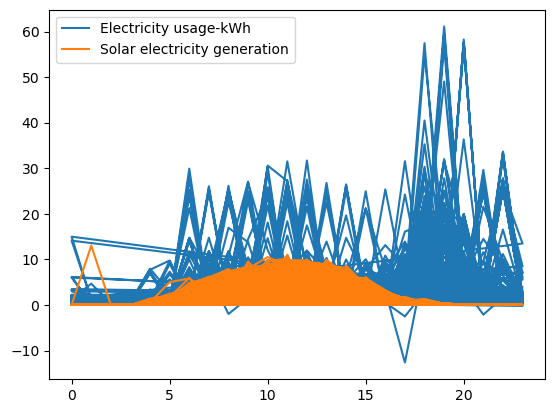

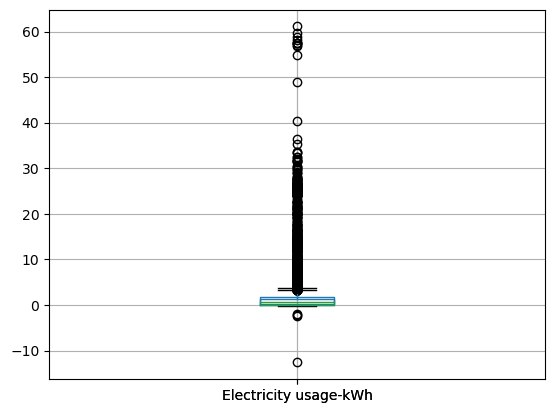

In [28]:
# Create a graph showing the average solar electricity generation and average electricity usage for each hour in a day.
plt.plot(dfSolarData['Hour'], dfSolarData['Electricity usage-kWh'], label='Electricity usage-kWh')
plt.plot(dfSolarData['Hour'], dfSolarData['Solar electricity generation (kWh)'], label='Solar electricity generation')

plt.legend()
plt.show()

# Investigate any significant outliers.
dfSolarData.boxplot('Solar electricity generation (kWh)')
dfSolarData.boxplot('Electricity usage-kWh')

# Make any corrections that are needed.
dfSolarData['Solar electricity generation (kWh)'].fillna(0, inplace=True)
dfSolarData['Electricity usage-kWh'].fillna(0, inplace=True)

Though crowded, the graph shows outliers in electricity usage and solar generation, considering the measured electricity usage is subject to zero. 




c:\Users\RYZEN\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
c:\Users\RYZEN\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


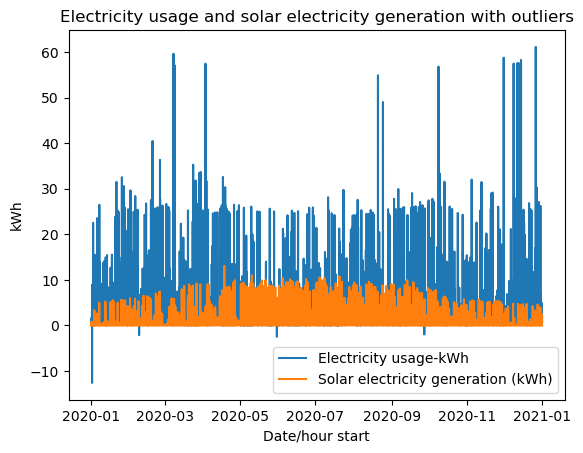

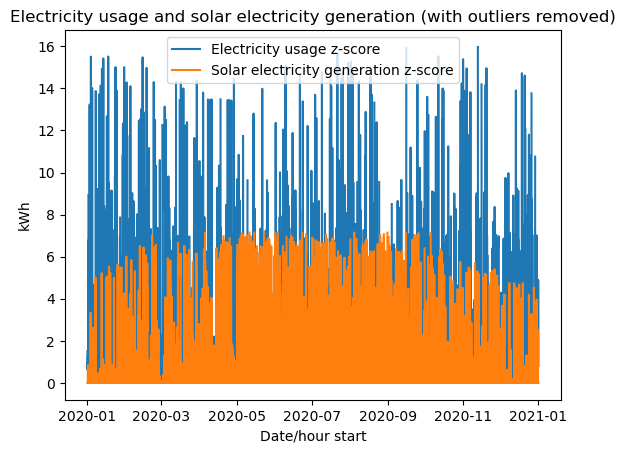

In [35]:
# calculate z-score for electricity usage and solar electricity generation
z_score_electricity_usage = np.abs(stats.zscore(dfSolarData['Electricity usage-kWh']))
z_score_solar_electricity_generation = np.abs(stats.zscore(dfSolarData['Solar electricity generation (kWh)']))

# create new column for electricity usage with z-score
dfSolarData['Electricity usage z-score'] = dfSolarData['Electricity usage-kWh'].apply(lambda x: x if x >= 0 else np.nan)

# create new column for solar electricity generation with z-score
dfSolarData['Solar electricity generation z-score'] = dfSolarData['Solar electricity generation (kWh)'].apply(lambda x: x if x >= 0 else np.nan)

# replace outliers with nan
dfSolarData['Electricity usage z-score'][z_score_electricity_usage > 3] = np.nan
dfSolarData['Solar electricity generation z-score'][z_score_solar_electricity_generation > 3] = np.nan

# plot linegraph with outliers
plt.plot(dfSolarData['Date/hour start'], dfSolarData['Electricity usage-kWh'], label='Electricity usage-kWh')
plt.plot(dfSolarData['Date/hour start'], dfSolarData['Solar electricity generation (kWh)'], label='Solar electricity generation (kWh)')
plt.legend()
plt.title('Electricity usage and solar electricity generation with outliers')
plt.xlabel('Date/hour start')
plt.ylabel('kWh')
plt.show()

# plot linegraph with outliers removed
plt.plot(dfSolarData['Date/hour start'], dfSolarData['Electricity usage z-score'], label='Electricity usage z-score')
plt.plot(dfSolarData['Date/hour start'], dfSolarData['Solar electricity generation z-score'], label='Solar electricity generation z-score')
plt.legend()
plt.title('Electricity usage and solar electricity generation (with outliers removed)')
plt.xlabel('Date/hour start')
plt.ylabel('kWh')
plt.show()


Next, we need to create a new column that calculates the average solar electricity generation and average electricity usage for each hour in a day; i.e. the average over all amounts for 1 am, and each subsequent hour within a 24-hour period.


In [ ]:
dfSolarData['Average solar electricity generation (kWh)'] = dfSolarData['Solar electricity generation (kWh)'].groupby(dfSolarData['Hour']).mean()
dfSolarData['Average electricity usage-kWh'] = dfSolarData['Electricity usage-kWh'].groupby(dfSolarData['Hour']).mean()

Now, we can plot the data using seaborn.

This will create a timeseries plot with error bands showing the average solar electricity generation and average electricity usage for each hour in a day. The title of the plot is "Average Solar Electricity Generation and Electricity Usage by Hour". The x-axis label is "Hour" and the y-axis label is "Average (kWh)".


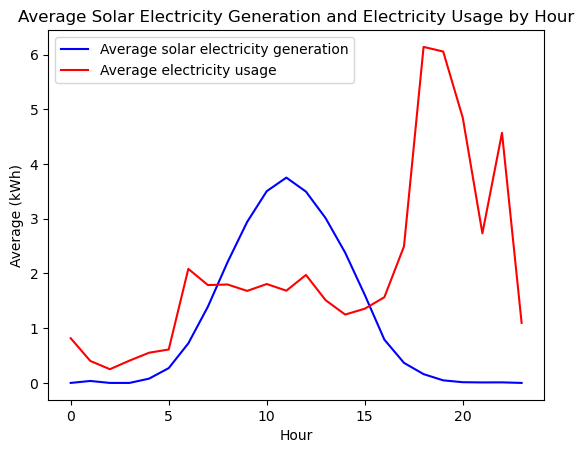

In [ ]:
sns.lineplot(data=dfSolarData, x='Hour', y='Average solar electricity generation (kWh)', color='blue')
sns.lineplot(data=dfSolarData, x='Hour', y='Average electricity usage-kWh', color='red')

plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xlabel('Hour')
plt.ylabel('Average (kWh)')
plt.legend(['Average solar electricity generation', 'Average electricity usage'])
plt.show()

It's clear that  solar electricity generation starts at the break of dawn with the slightest light, and peaks at aound midday, and reduces as the day ends, and back to zero when the sun sets. 
Electricity usage on the other hand peaks from 6pm, probably after work hours.

Since Naomi doesn't have battery installed, she is loosing a lot of benefits at the time when she needs it the most!

# Task 2,3,4
Calculate, for each hour in 2020, the amount of electricity that needed to be bought from the electricity provider (measured in kWh and subject to a minimum of zero).Electricity that needed to be bought,for each hour, assuming that Naomi took advantage of solar electricity, is the electricity usage minus the solar-generated electricity. We will create a column for this data.


Calculate, for each hour in 2020, the excess solar electricity generated over electricity used (measured in kWh and subject to a minimum of zero).
Excess Solar Electricity = Max(0, Solar Generation - Electricity Usage)





In [40]:
dfSolarData['bought electricity'] = dfSolarData['Electricity usage-kWh'] - dfSolarData['Solar electricity generation (kWh)']
dfSolarData['bought electricity'] = np.where(dfSolarData['bought electricity'] < 0, np.nan, dfSolarData['bought electricity'])

dfSolarData['excess solar'] = dfSolarData['Solar electricity generation (kWh)'] - dfSolarData['Electricity usage-kWh']
dfSolarData['excess solar'] = np.where(dfSolarData['excess solar'] < 0, np.nan, dfSolarData['excess solar'])

This code will first calculate the difference between the values in column id 2 and column id 3, and then use the `np.where()` function to replace any negative values with `np.nan`. This will ensure that the column output is always greater than or equal to zero.


In [44]:
dfSolarData.head(10)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage-kWh,Electricity usage z-score,Solar electricity generation z-score,bought electricity,excess solar
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,1.509849,NaN
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,1.411859,NaN
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,1.023898,NaN
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.642000,NaN
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.960000,NaN
5,5,2020-01-01 05:00:00,0.012,0.897000,0.897000,0.012,0.885000,NaN
6,6,2020-01-01 06:00:00,0.006,0.648000,0.648000,0.006,0.642000,NaN
7,7,2020-01-01 07:00:00,0.009,0.774000,0.774000,0.009,0.765000,NaN
8,8,2020-01-01 08:00:00,0.012,1.299000,1.299000,0.012,1.287000,NaN
9,9,2020-01-01 09:00:00,0.846,0.606000,0.606000,0.846,NaN,0.24


In [51]:
dfSolarData.to_csv('cleandata.csv', index = False)
dfcleandata = pd.read_csv('d:/PULA INTERVIEW/data/cleandata.csv')
dfcleandata.head()

,Hour,Date/hour start,Electricity usage,Solar electricity generation,electricity bought,excess solar
0,0,1/1/2020 0:00,1.509849,0.0,1.509849,NaN
1,1,1/1/2020 1:00,1.411859,0.0,1.411859,NaN
2,2,1/1/2020 2:00,1.023898,0.0,1.023898,NaN
3,3,1/1/2020 3:00,0.642000,0.0,0.642000,NaN
4,4,1/1/2020 4:00,0.960000,0.0,0.960000,NaN


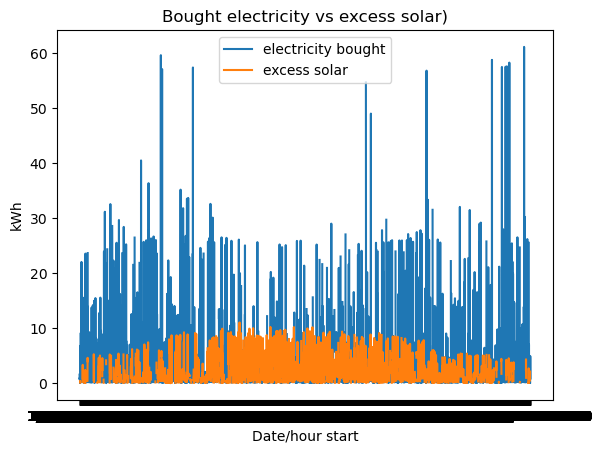

In [53]:
# plot linegraph showing bought electricity vs excess solar
plt.plot(dfcleandata['Date/hour start'], dfcleandata['electricity bought '], label='electricity bought')
plt.plot(dfcleandata['Date/hour start'], dfcleandata['excess solar'], label='excess solar')
plt.legend()
plt.title('Bought electricity vs excess solar)')
plt.xlabel('Date/hour start')
plt.ylabel('kWh')
plt.show()


# Task 4

Model the cumulative battery charge level (measured in kWh) for each hour over 2020, assuming a battery had already been installed.

The battery charge level should:

•	begin at zero at 1 January 2020 00:00.
•	allow for the increase or decrease in charge level depending on the hourly results of parts (ii) and (iii).
•	be subject to the cap on the maximum battery charge level.
